<a href="https://colab.research.google.com/github/ConnerV42/MachineLearning/blob/master/AssignmentSix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Jupyter Notebook, we will performing deep learning on text data from the IMDB dataset. In order to download the relevent embeddings, uncomment the !wget command, and run the first cell. Once the !wget command has been run once, you should be able to extract ***glove.6B.100d.txt*** using zipfile.

In [0]:
## Command to download glove.6B.zip to your colab environment
## !wget !wget http://nlp.stanford.edu/data/glove.6B.zip

## Extract the 100 dimension embedding: aclImdb.zip
import zipfile
zipfile.ZipFile('glove.6B.zip', 'r').extract('glove.6B.100d.txt', '.')

'glove.6B.100d.txt'

Next, we will be importing numpy for mathematical operations, as well as the imdb dataset, and the keras preprocessing library of python functions.

The ***max_features*** variable exists to specify to our model the number of words to consider as features in the model.

The ***imdb.load_data()*** function loads our data as a list of integers, and cleanly splits it into training and validation sets. From there, we call the keras function ***pad_sequences()***, which converts the list of integers into a 2D integer tensor of shape (samples, maxlen).

In [0]:
#!pip install numpy==1.16.1
import numpy as np
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
tokenizer = preprocessing.text.Tokenizer(num_words=max_features)
word_index = tokenizer.word_index

In this next step, we use a for loop in order to create an embedding matrix, that we can pass into the ***Embedding()*** function/layer of our model. The matrix is the shape of (max_words, embedding_dim). 

The model contains the aforementioned embedding layer,
a Flatten layer, and a Dense layer. There will be 10 epochs for the model.

In [22]:
f = open("glove.6B.100d.txt")

embeddings_index = {}
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors' % len(embeddings_index))

embedding_dim = 100
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
  if i < max_features:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# This is where we are injecting our embeddings matrix into our model.
# Additionally, we are setting the embedding layer's 'trainable' field to false,
# because the pretrained parts of our model shouldn't be updated during training.
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.2)

Found 400000 word vectors
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                64032     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,064,065
Trainable params: 1,064,065
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 102us/step - loss: 0.6932 - acc: 0.4964 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 2/10
20000/20000 [===========================

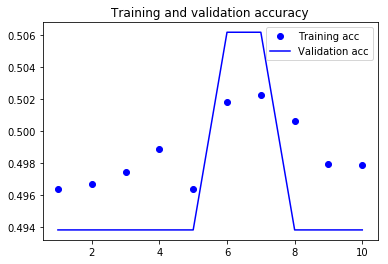

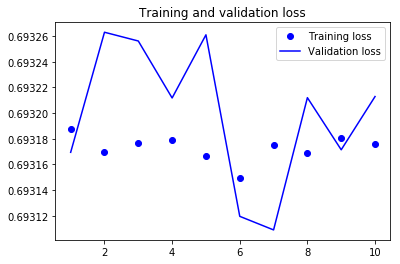

In [23]:
# Here, we will be plotting the Validation Accuracy, and well as the Validation Loss

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:

model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 35us/step


[2.6185387660980224, 0.67492]